In [39]:
import os
import numpy as np
import pandas as pd
from glob import glob
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
DATA_PATH = "/Users/akshar/Documents/College Courses/OMSA Project/GT Practicum KMAS Data"

# for subdir, _, files in os.walk(DATA_PATH):
#     for file in files:
#         if file.endswith(".xlsx"):
#             print (file)

In [8]:
AP_EXAM_DATA_PATH = "/Users/akshar/Documents/College Courses/OMSA Project/GT Practicum KMAS Data/AP Scores"
AP_Scores_dfs = []
for subdir, _, files in os.walk(AP_EXAM_DATA_PATH):
    for file in files:
        if file.endswith(".xlsx"):
#             print (pd.read_excel(subdir + os.sep + file).columns)
            AP_Scores_dfs.append(pd.read_excel(subdir + os.sep + file))
        if file.endswith(".csv"):
            df = pd.read_csv(subdir + os.sep + file)
            df.rename({"Student Identifier": "Student ID"}, inplace=True)
            AP_Scores_dfs.append(df)
            
# AP_Scores_dfs = [df.set_index("Student ID") for df in AP_Scores_dfs]
# Issues concacting dataFrames on Student ID Key
AP_Scores = pd.concat(AP_Scores_dfs, axis=0)
# display (AP_Scores)

In [24]:
AP_Exam_Data = pd.read_excel("/Users/akshar/Documents/College Courses/OMSA Project/GT Practicum KMAS Data/AP Scores/2019 AP Scores Student Roster File_BAIN.xlsx")
ACT_Score_data = pd.read_excel("/Users/akshar/Documents/College Courses/OMSA Project/GT Practicum KMAS Data/ACT Scores/Metro Atlanta ACT Test Scores 3-12-2020_BAIN.xlsx")
print (AP_Exam_Data.keys(), ACT_Score_data.keys())
comb_Data = AP_Exam_Data.set_index("Student ID").join(ACT_Score_data.set_index("local_student_id")).dropna(subset=['max_act_score'])
display(comb_Data)

Index(['AP Number / AP ID', 'Subject', 'Score', 'Discipline', 'Grade Level',
       'Student ID', 'Attending School Name', 'Attending School AI Code',
       'Instructed at this School?', 'Section Name', 'Teacher'],
      dtype='object') Index(['region_name', 'school_id', 'school_name', 'Cohort',
       'salesforce_student_id', 'local_student_id', 'Full_Name__c',
       'n_tests_taken', 'max_act_score', 'test_id', 'ACT_Composite__c',
       'ACT_English__c', 'ACT_Math__c', 'ACT_Reading__c', 'ACT_Science__c',
       'is_best_score', 'test_order', 'date_taken'],
      dtype='object')


,AP Number / AP ID,Subject,Score,Discipline,Grade Level,Attending School Name,Attending School AI Code,Instructed at this School?,Section Name,Teacher,...,max_act_score,test_id,ACT_Composite__c,ACT_English__c,ACT_Math__c,ACT_Reading__c,ACT_Science__c,is_best_score,test_order,date_taken
1023762.0,99016841,English Language and Composition,1,English,11th Grade,KIPP Atlanta Collegiate High School,110152,Y,All Students,No Teacher Assigned,...,16.0,a0B3c00000iJzZOEA0,16.0,14.0,15.0,16.0,17.0,1.0,1.0,2019-04-15
1028323.0,99012951,English Literature and Composition,1,English,12th Grade,KIPP Atlanta Collegiate High School,110152,Y,All Students,No Teacher Assigned,...,15.0,a0BC000000gy5b1MAA,15.0,15.0,14.0,18.0,13.0,1.0,1.0,2018-04-15
1028323.0,99012951,Statistics,1,Mathematics and Computer Science,12th Grade,KIPP Atlanta Collegiate High School,110152,Y,All Students,No Teacher Assigned,...,15.0,a0BC000000gy5b1MAA,15.0,15.0,14.0,18.0,13.0,1.0,1.0,2018-04-15
1029269.0,99011866,English Literature and Composition,1,English,12th Grade,KIPP Atlanta Collegiate High School,110152,Y,All Students,No Teacher Assigned,...,17.0,a0BC000000gCJqsMAG,16.0,12.0,16.0,19.0,17.0,0.0,1.0,2017-10-01
1029269.0,99011866,English Literature and Composition,1,English,12th Grade,KIPP Atlanta Collegiate High School,110152,Y,All Students,No Teacher Assigned,...,17.0,a0BC000000gUqSRMA0,14.0,12.0,20.0,12.0,13.0,0.0,2.0,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110286.0,99016876,United States History,1,History and Social Sciences,11th Grade,KIPP Atlanta Collegiate High School,110152,Y,All Students,No Teacher Assigned,...,22.0,a0B3c00000irUqTEAU,22.0,23.0,17.0,22.0,25.0,1.0,2.0,2019-09-01
2111134.0,99013346,English Language and Composition,1,English,11th Grade,KIPP Atlanta Collegiate High School,110152,Y,All Students,No Teacher Assigned,...,19.0,a0B3c00000iIU38EAG,19.0,20.0,16.0,20.0,19.0,1.0,1.0,2019-04-15
2111134.0,99013346,English Language and Composition,1,English,11th Grade,KIPP Atlanta Collegiate High School,110152,Y,All Students,No Teacher Assigned,...,19.0,a0B3c00000jlIWrEAM,19.0,20.0,16.0,18.0,21.0,0.0,2.0,2019-10-01
2111134.0,99013346,United States History,1,History and Social Sciences,11th Grade,KIPP Atlanta Collegiate High School,110152,Y,All Students,No Teacher Assigned,...,19.0,a0B3c00000iIU38EAG,19.0,20.0,16.0,20.0,19.0,1.0,1.0,2019-04-15


In [21]:
# print (np.intersect1d(AP_Exam_Data['Student ID'], ACT_Score_data["local_student_id"]))
print (comb_Data.keys())

Index(['AP Number / AP ID', 'Subject', 'Score', 'Discipline', 'Grade Level',
       'Attending School Name', 'Attending School AI Code',
       'Instructed at this School?', 'Section Name', 'Teacher'],
      dtype='object')


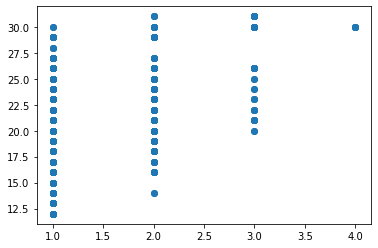

In [29]:
plt.scatter(comb_Data['Score'], comb_Data['max_act_score'])

In [106]:
# english_Data = comb_Data.loc[(comb_Data['Subject'] == 'English Language and Composition' & comb_Data['Subject'] == 'English Literature and Composition')]
# display (english_Data)
ACT_Score_data = pd.read_excel("/Users/akshar/Documents/College Courses/OMSA Project/GT Practicum KMAS Data/ACT Scores/Metro Atlanta ACT Test Scores 3-12-2020_BAIN.xlsx")
ACT_Score_data.drop(columns=['region_name', 'school_id', 'local_student_id', 'school_name', 'salesforce_student_id', 'Full_Name__c', 'n_tests_taken', 'test_id', 'test_order'], inplace=True)

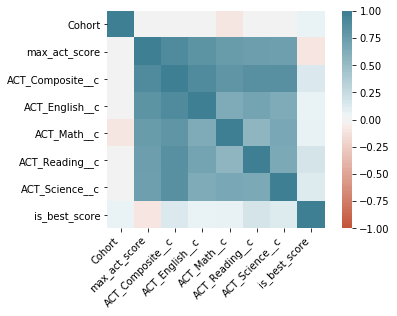

In [107]:
corr = ACT_Score_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [109]:
cohorts = ACT_Score_data.groupby('is_best_score').get_group(1).groupby('Cohort')
# print (cohorts.describe())
groups = cohorts.groups
key_list_from_gb = cohorts.groups.keys()
print (cohorts.groups.keys())

dict_keys([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])


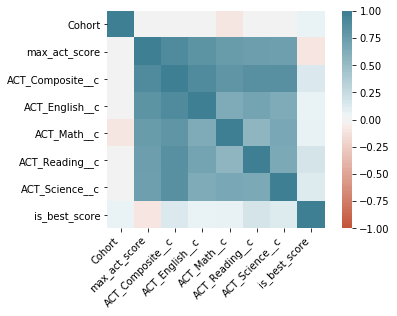

In [110]:
# cohorts = ACT_Score_data.groupby('Cohort').corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

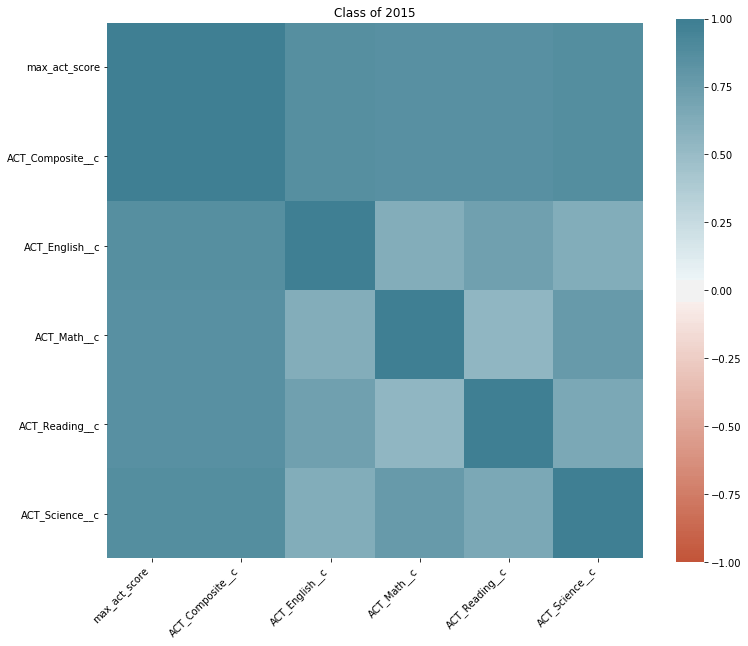

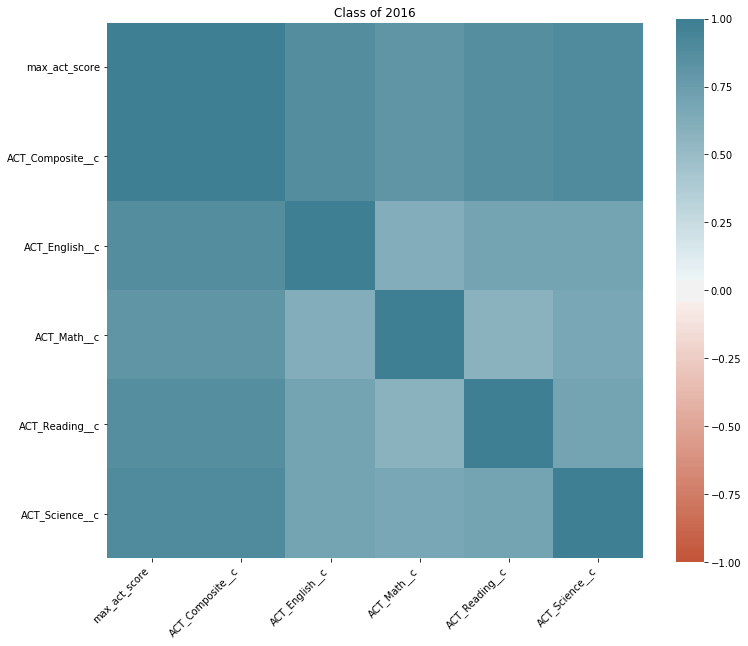

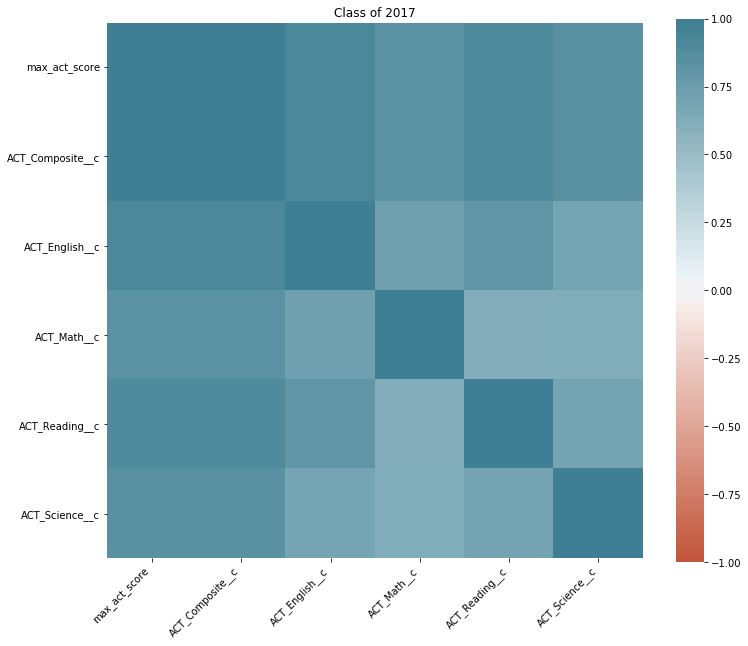

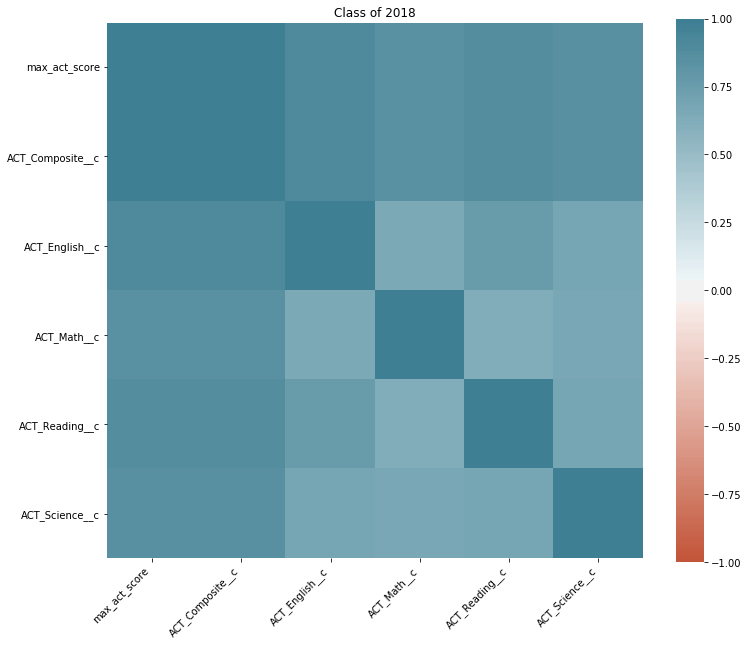

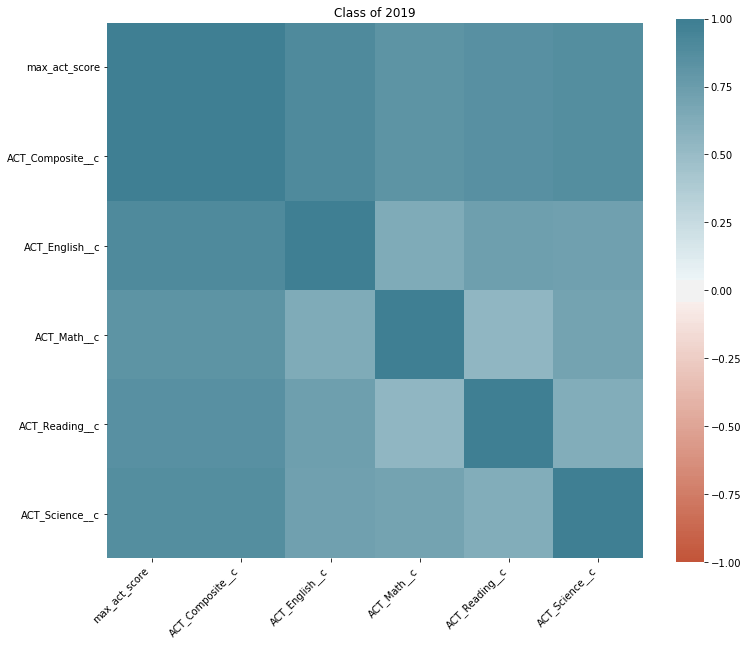

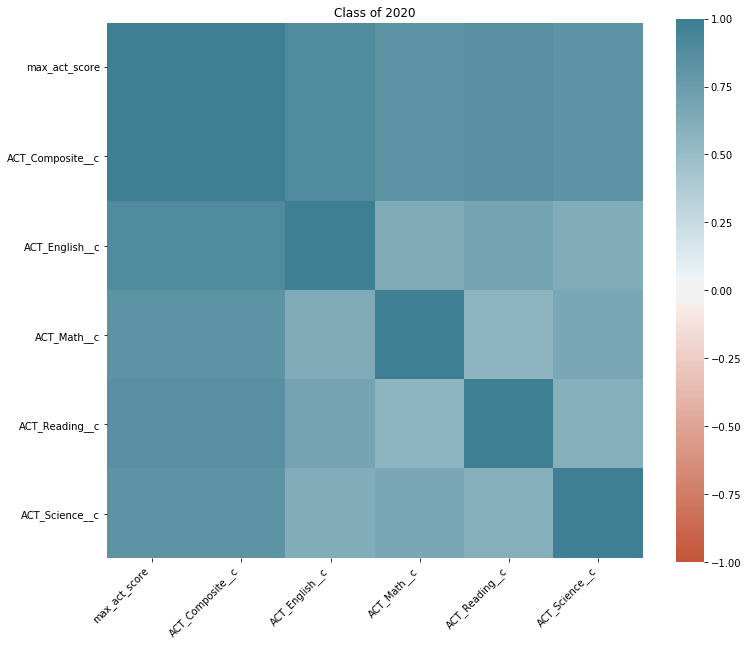

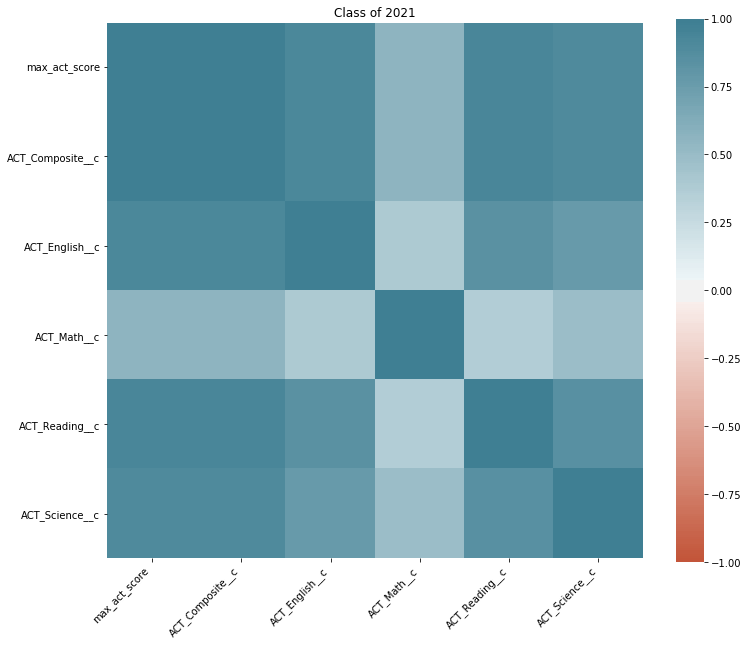

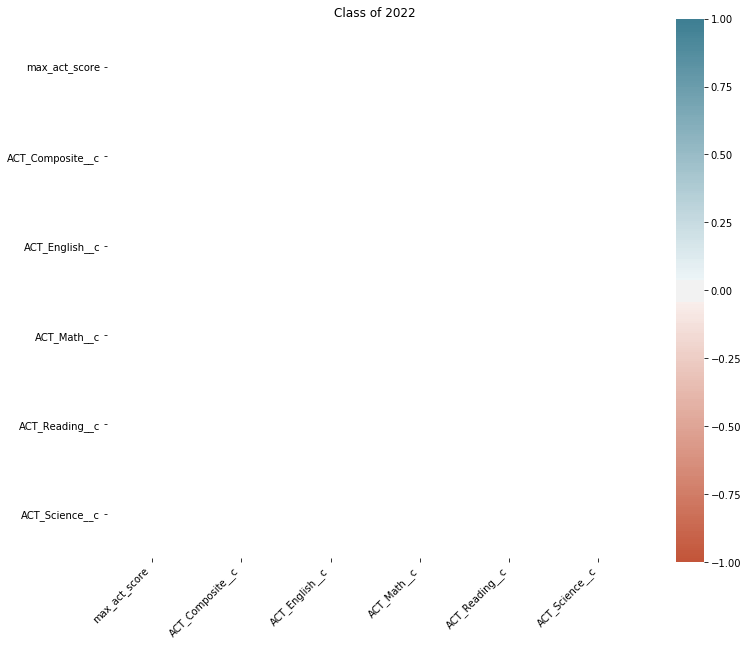

In [112]:
for key in key_list_from_gb:
    data = cohorts.get_group(key).drop(columns=['Cohort', 'is_best_score'])
    corr = data.corr()
    plt.figure()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_title(f'Class of {key}')
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );
    fig = ax.get_figure()
    fig.set_size_inches(12, 10)
    fig.savefig(f"/Users/akshar/Documents/College Courses/OMSA Project/OMSA_Final_Project/Plots/{key}_Corr_Matrix.png")